In [78]:
from typing import List
import numpy as np
import pandas as pd
from sklearn import linear_model, neighbors, svm, ensemble, tree, neural_network, pipeline, preprocessing
import matplotlib.pyplot as plt
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 5]

In [79]:
where_combined = [
    'none_mobile',
    'wifi_pc',
    'wifi_cloud'
]

data = pd.read_csv('./learning_data_new_dataset.csv', sep=';')

In [80]:
class DumbScaler:
    def __init__(self, x, y, reg):
        if min(y) < 0.01:
            self.scaler = 10 ** (int(abs(math.log10(min(y))))+1)
        else:
            self.scaler = 1

        self.x = x
        self.y = list(map(lambda y: y * self.scaler, y))
        self.reg = reg
        self.reg.fit(np.array(self.x).reshape(-1,1), np.array(self.y).reshape(-1,1))

    def predict(self, x):
        return self.reg.predict(x) / self.scaler

    def score(self, x, y):
        return self.reg.score(x,list(map(lambda y: y * self.scaler, y)))

In [81]:
def linear_regression(x: List[float], y: List[float]) -> linear_model.LinearRegression:
    regression = linear_model.LinearRegression()
    regression.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return regression


def knn(x: List[float], y: List[float]) -> neighbors.KNeighborsRegressor:
    neigh = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform')
    neigh.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return neigh

def nn_mlp(x: List[float], y: List[float]) -> DumbScaler:
    nn_reg = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        neural_network.MLPRegressor(random_state=0, max_iter=1100)
    )

    return DumbScaler(x, y, nn_reg)

def svm_reg(x: List[float], y: List[float]) -> DumbScaler:
    svr = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        svm.SVR(C=50, kernel='linear')
    )
    # svr.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return DumbScaler(x, y, svr)

def bayesan_ridge(x: List[float], y: List[float]) -> linear_model.BayesianRidge:
    br = linear_model.BayesianRidge()
    br.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return br

def random_forest(x: List[float], y: List[float]) -> ensemble.RandomForestRegressor:
    rf = ensemble.RandomForestRegressor(max_depth=2)
    rf.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return rf

def logistic_regression(x: List[float], y: List[float]) -> linear_model.LogisticRegression:
    lr = pipeline.make_pipeline(
        preprocessing.LabelEncoder(),
        linear_model.LogisticRegression(random_state=0)
    )
    lr.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return lr

def decision_tree(x: List[float], y: List[float]) -> tree.DecisionTreeRegressor:
    dt = tree.DecisionTreeRegressor(max_depth=3)
    dt.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return dt

def gradient_boosting(x: List[float], y: List[float]) -> ensemble.GradientBoostingRegressor:
    gb = ensemble.GradientBoostingRegressor(random_state=0)
    gb.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

    return gb

In [82]:
regressions = dict(
    lr=linear_regression,
    neigh=knn,
    svr=svm_reg,
    br=bayesan_ridge,
    rand_f=random_forest,
    # logistic=logistic_regression,
    mlp=nn_mlp,
    dec_tree=decision_tree,
    g_boost=gradient_boosting
)

In [94]:
models = {name: {
    where: {
        'battery': regression(list(data[data['where'] == where].sort_values('metric')['metric'].head(96)), list(data[data['where'] == where].sort_values('metric')['battery'].head(96))),
        'time': regression(list(data[data['where'] == where].sort_values('metric')['metric'].head(96)), list(data[data['where'] == where].sort_values('metric')['time_mean'].head(96)))
    } for where in where_combined
} for name, regression in regressions.items()}

/Users/jakubpajor/Desktop/IX_semestr/magisterka/python_sandbox/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jakubpajor/Desktop/IX_semestr/magisterka/python_sandbox/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jakubpajor/Desktop/IX_semestr/magisterka/python_sandbox/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jakubpajor/Desktop/IX_semestr/magisterka/python_sandbox/venv/lib/python3.8/sit

In [ ]:
for k, v in regressions.items():
    print(k,v)

In [26]:
gnb = linear_model.BayesianRidge()
gnb.fit(np.array(data[data['where'] == 'wifi_pc']['metric']).reshape(-1,1), list(data[data['where'] == 'wifi_pc']['time_mean']))

BayesianRidge()

In [27]:
np.array(data[data['where'] == 'wifi_pc']['metric']).reshape(-1,1)

array([[  64885],
       [  30233],
       [  23433],
       [  19603],
       [ 168003],
       [  67433],
       [ 137553],
       [ 198755],
       [  21587],
       [  55793],
       [  24177],
       [  12231],
       [  47527],
       [  31663],
       [  20617],
       [  13857],
       [  46011],
       [  67359],
       [ 255753],
       [ 130151],
       [ 128001],
       [  94319],
       [  54337],
       [  75819],
       [ 173551],
       [  96873],
       [  67133],
       [  22371],
       [  12369],
       [  56439],
       [  60167],
       [  59127],
       [  37953],
       [  35677],
       [  63127],
       [  53901],
       [ 105213],
       [  57265],
       [ 197853],
       [ 240103],
       [ 104147],
       [ 171129],
       [ 248143],
       [  49295],
       [ 387471],
       [  25549],
       [  64239],
       [  53733],
       [  59121],
       [  65075],
       [ 771971],
       [ 222865],
       [ 224931],
       [ 242023],
       [ 338821],
       [ 3

In [ ]:
list(data[data['where'] == 'wifi_pc']['time_mean'])


In [28]:
models['dec_tree']['wifi_pc']['time'].predict([[80000]])

array([8.98561929])

In [47]:
x = list(range(10**4, 2 * 10**6 + 1, 10000))

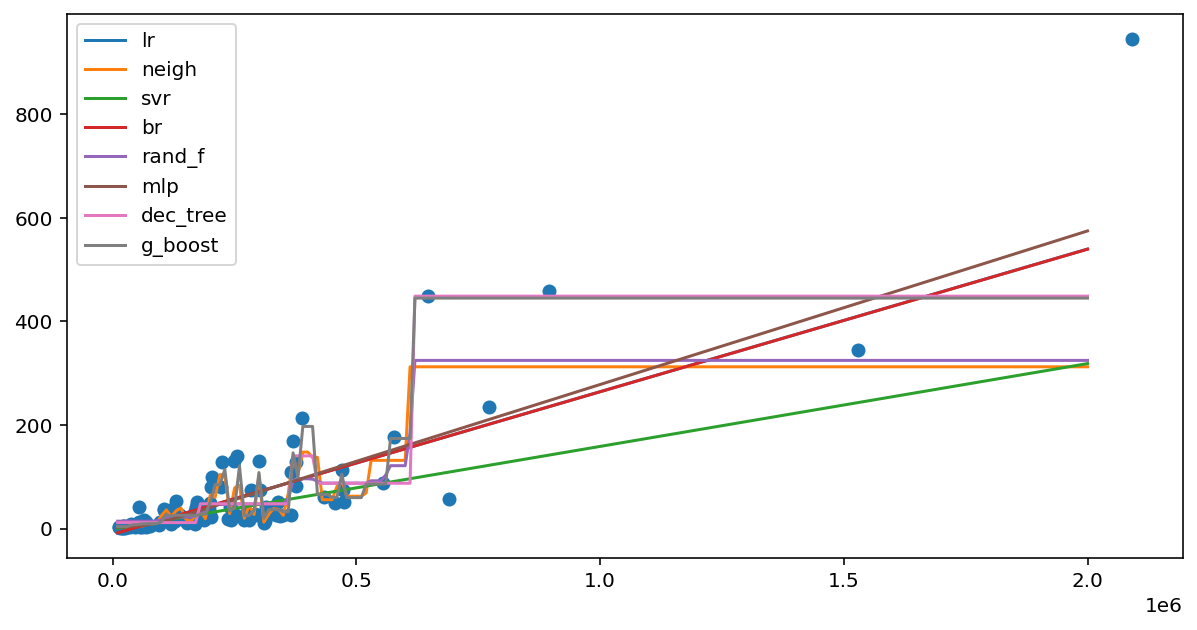

In [84]:
for reg, model in models.items():
    y = [model['none_mobile']['time'].predict([[i]])[0] for i in x]
    plt.plot(x, y, label=reg)

plt.scatter(data[data['where'] == 'none_mobile']['metric'], data[data['where'] == 'none_mobile']['time_mean'])
plt.legend()

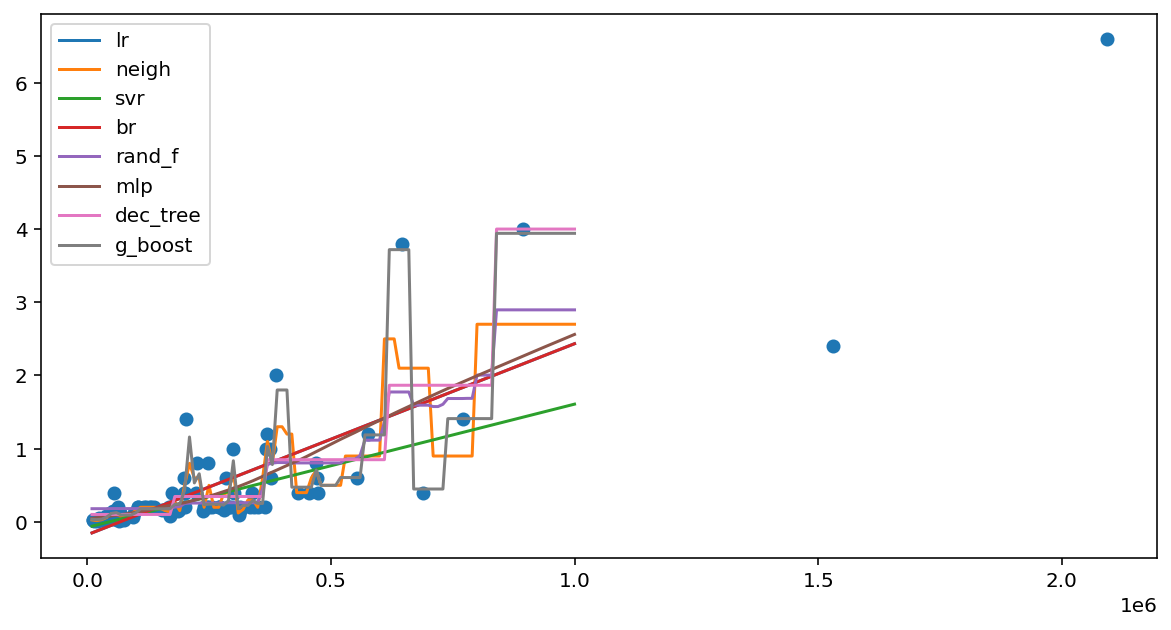

In [38]:
for reg, model in models.items():
    y = [model['none_mobile']['battery'].predict([[i]])[0] for i in x]
    plt.plot(x, y, label=reg)

plt.scatter(data[data['where'] == 'none_mobile']['metric'], data[data['where'] == 'none_mobile']['battery'])
plt.legend()

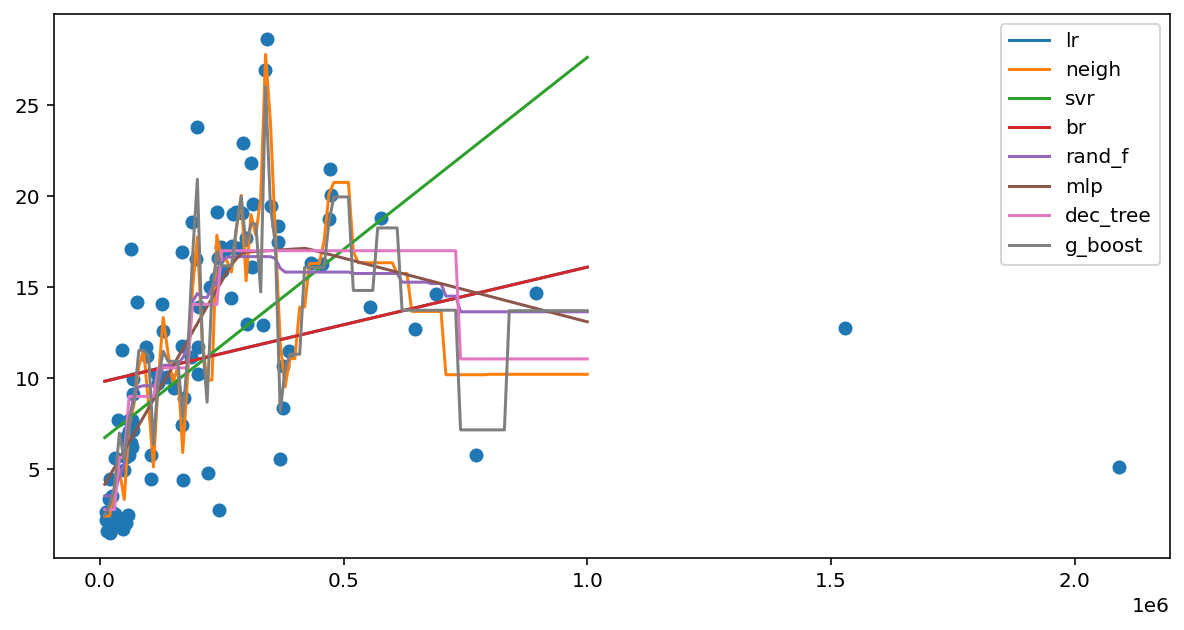

In [39]:
for reg, model in models.items():
    y = [model['wifi_pc']['time'].predict([[i]])[0] for i in x]
    plt.plot(x, y, label=reg)

plt.scatter(data[data['where'] == 'wifi_pc']['metric'], data[data['where'] == 'wifi_pc']['time_mean'])
plt.legend()

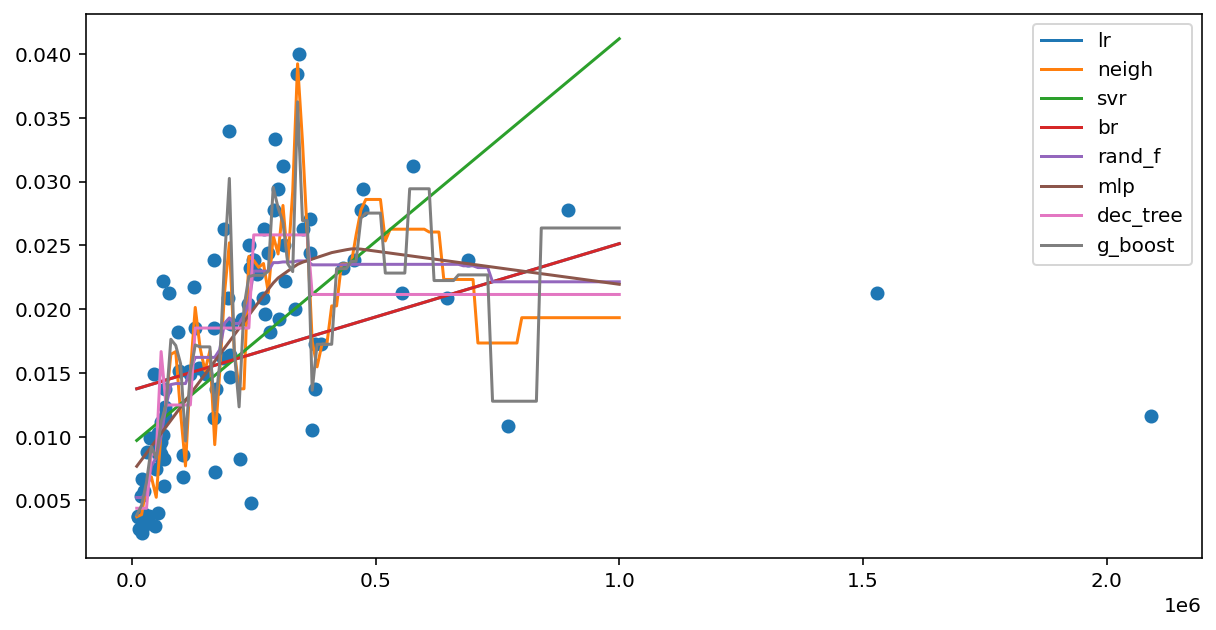

In [40]:
for reg, model in models.items():
    y = [model['wifi_pc']['battery'].predict([[i]])[0] for i in x]
    plt.plot(x, y, label=reg)

plt.scatter(data[data['where'] == 'wifi_pc']['metric'], data[data['where'] == 'wifi_pc']['battery'])
plt.legend()

ValueError: No axis named metric for object type Series

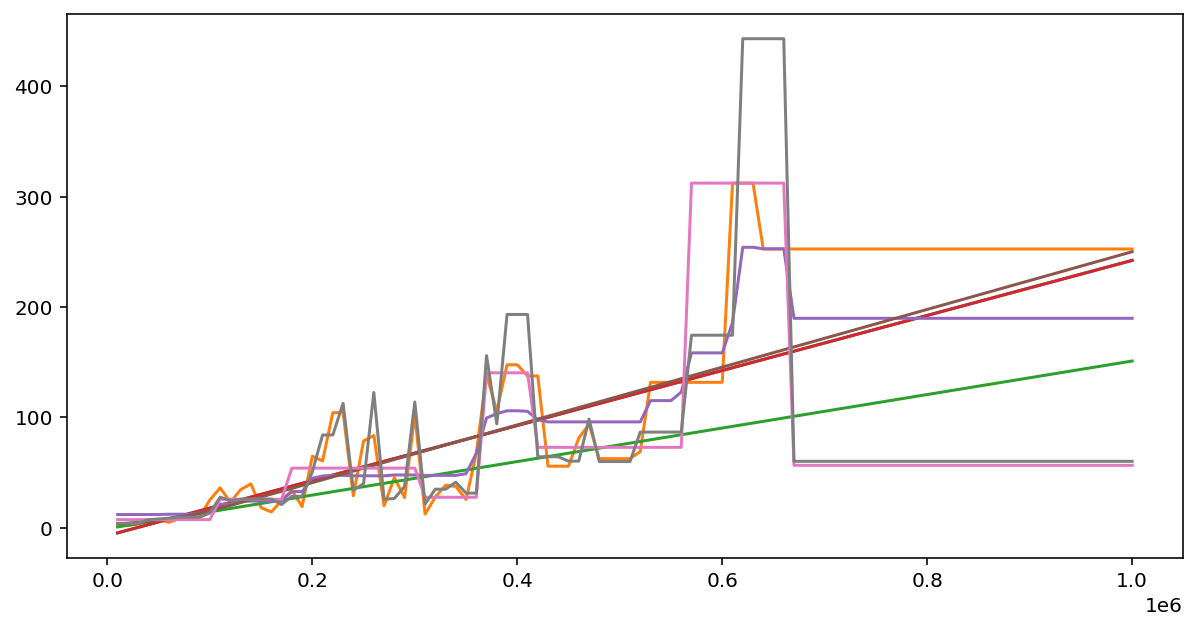

In [98]:
x = list(range(10**4, 10**6 + 1, 10000))
for where in where_combined:
    for reg, model in models.items():
        y = [model[where]['time'].predict([[i]])[0] for i in x]
        plt.plot(x, y, label=reg)

    plt.scatter(data[data['where'] == where]['metric'].sort_values('metric').head(96), data[data['where'] == where]['time_mean'].sort_values('metric').head(96))
    plt.legend()
    plt.title(f'{where} - time')
    plt.show()

    for reg, model in models.items():
        y = [model[where]['battery'].predict([[i]])[0] for i in x]
        plt.plot(x, y, label=reg)

    plt.scatter(data[data['where'] == where]['metric'].sort_values('metric').head(96), data[data['where'] == where]['battery'].sort_values('metric').head(96))
    plt.legend()
    plt.title(f'{where} - battery')
    plt.show()

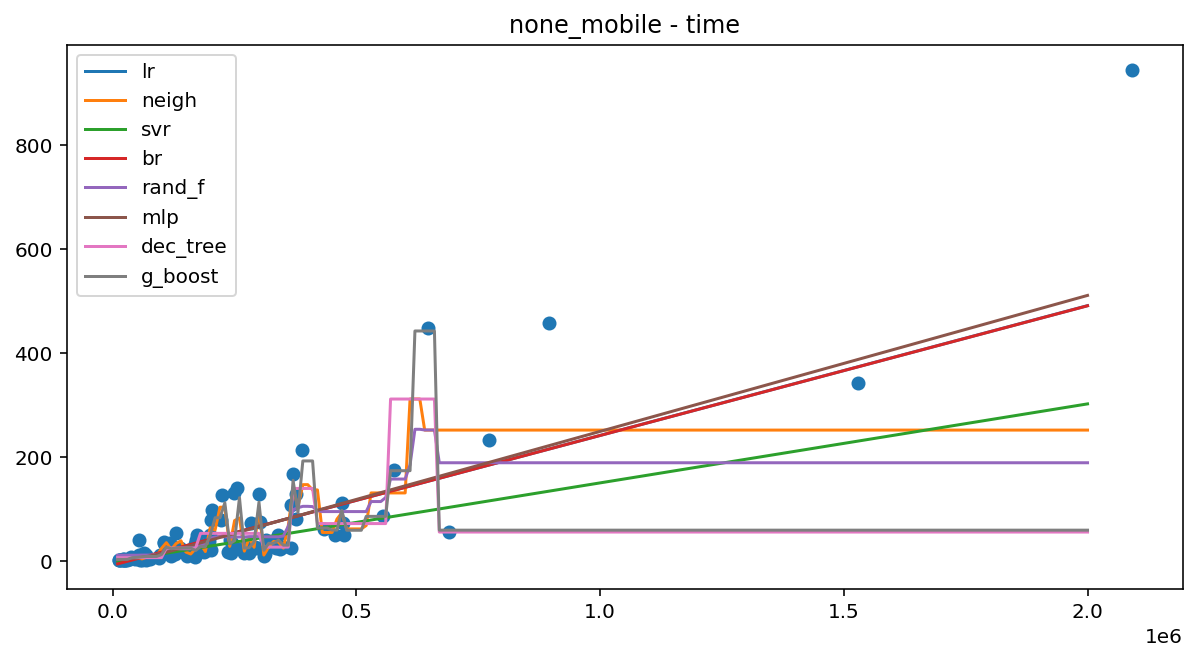

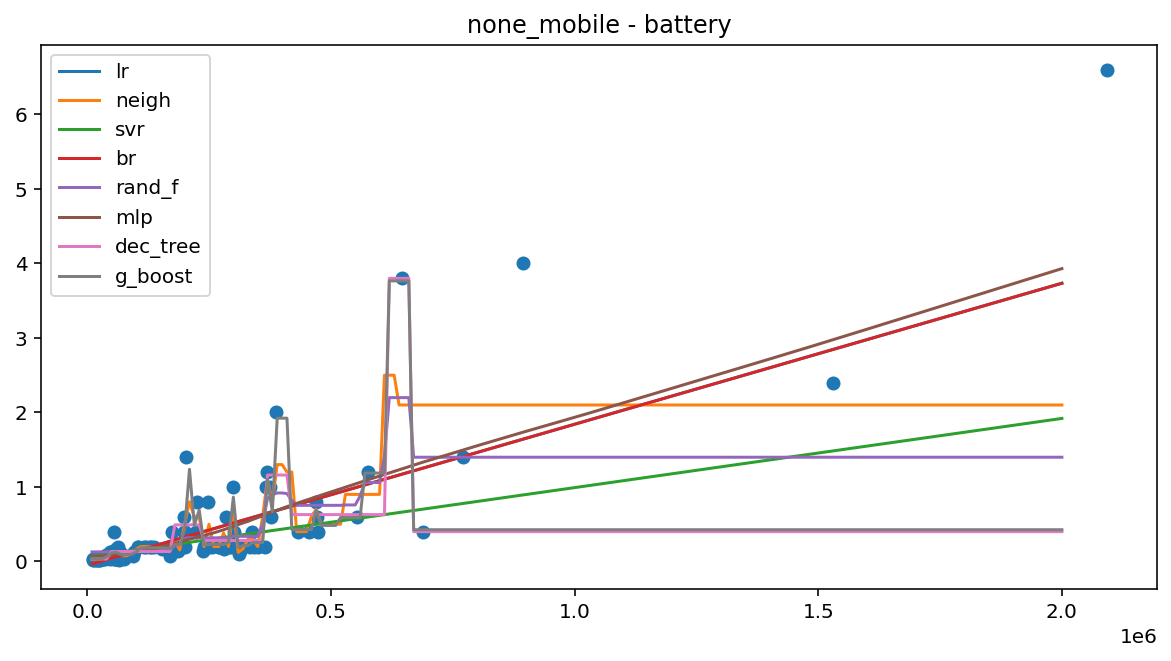

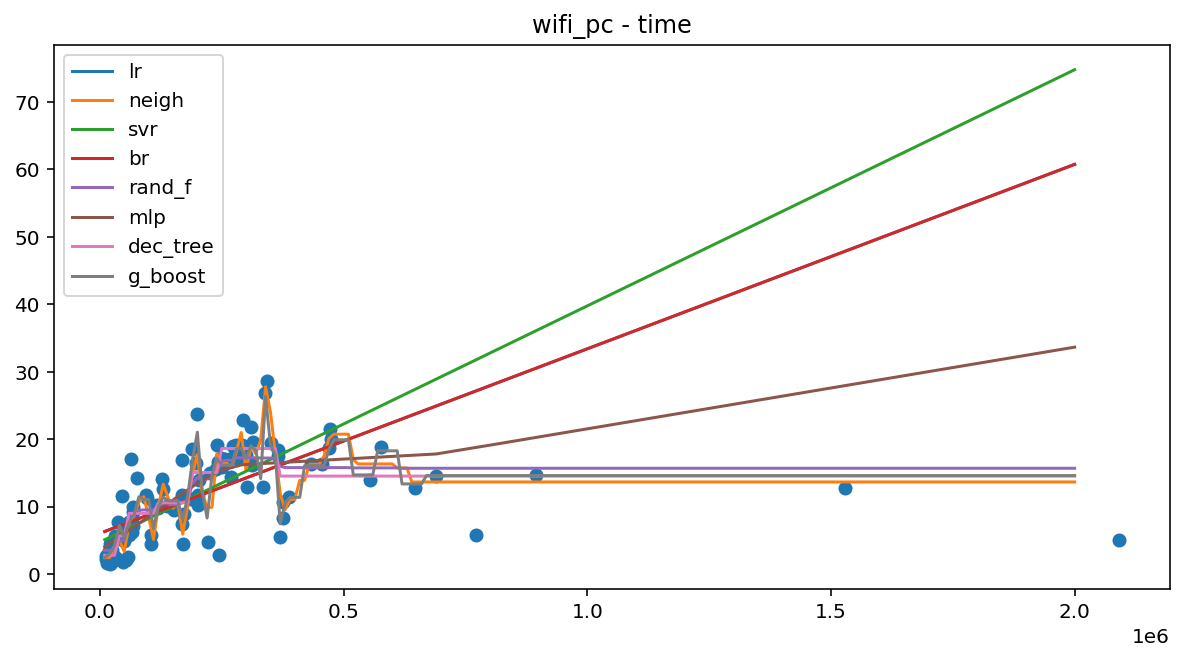

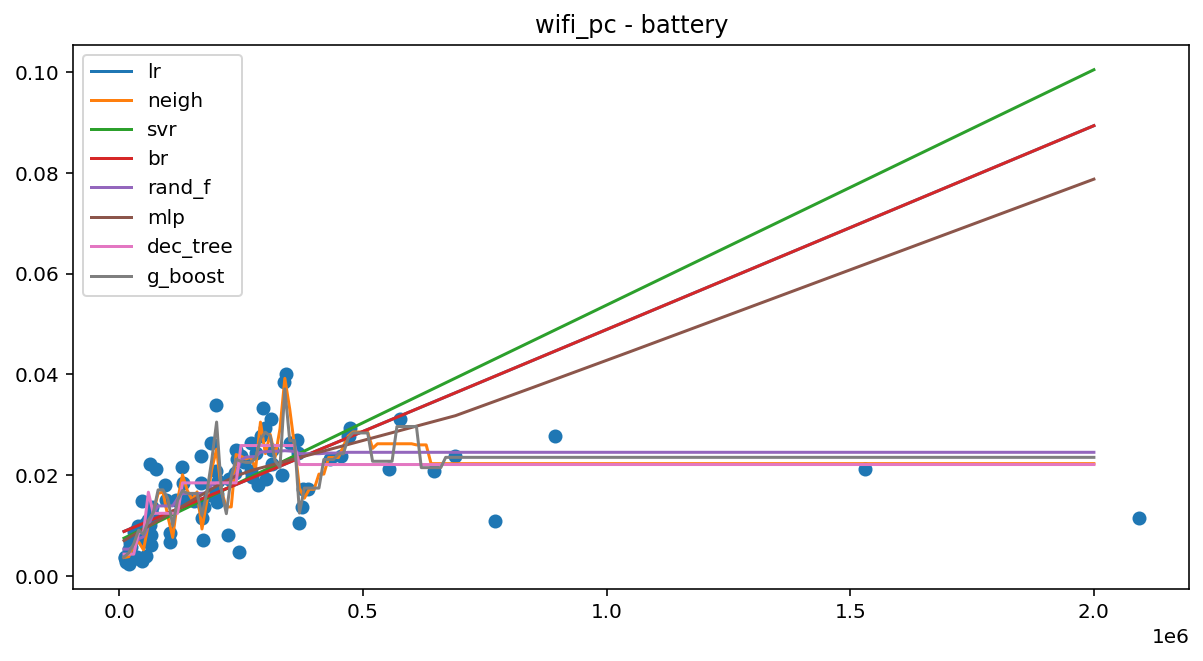

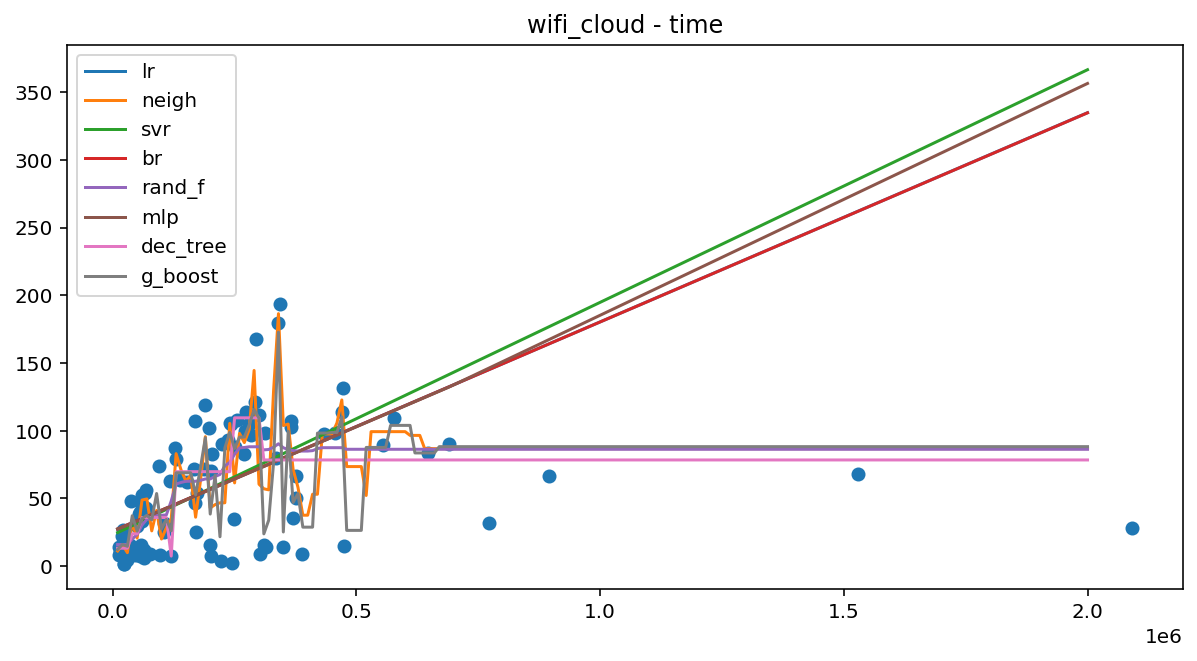

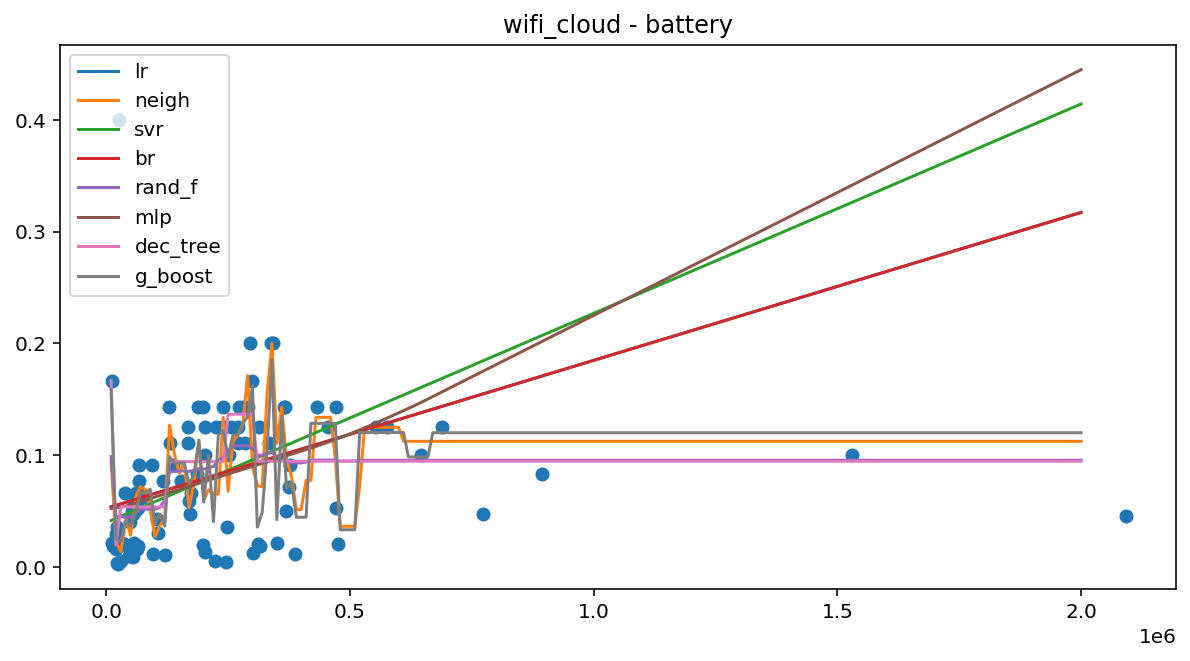

In [96]:
x = list(range(10**4, 10**6 + 1, 10000))
for where in where_combined:
    for reg, model in models.items():
        y = [model[where]['time'].predict([[i]])[0] for i in x]
        plt.plot(x, y, label=reg)

    plt.scatter(data[data['where'] == where]['metric'].head(96), data[data['where'] == where]['time_mean'].head(96))
    plt.legend()
    plt.title(f'{where} - time')
    plt.show()

    for reg, model in models.items():
        y = [model[where]['battery'].predict([[i]])[0] for i in x]
        plt.plot(x, y, label=reg)

    plt.scatter(data[data['where'] == where]['metric'].head(96), data[data['where'] == where]['battery'].head(96))
    plt.legend()
    plt.title(f'{where} - battery')
    plt.show()

In [93]:
for where in where_combined:
    print(where)
    for reg, model in models.items():
        print(
            '\t',
            reg,
            model[where]['time'].score(np.array(data[data['where'] == where]['metric'].head(96)).reshape(-1,1), list(data[data['where'] == where]['time_mean'].head(96))),
            model[where]['battery'].score(np.array(data[data['where'] == where]['metric'].head(96)).reshape(-1,1), list(data[data['where'] == where]['battery'].head(96)))
        )

none_mobile
	 lr 0.7244454919970773 0.682286126596821
	 neigh 0.6962878881605248 0.7216164884443886
	 svr 0.6109732021145897 0.5650177236108593
	 br 0.7243730384480258 0.682286121731351
	 rand_f 0.6297209725120557 0.6607757208554541
	 mlp 0.7223810061946658 0.6947411139220108
	 dec_tree 0.657268778759093 0.7758623543411375
	 g_boost 0.7418665125338322 0.7756512093276465
wifi_pc
	 lr -0.026570835492301104 0.023484302385338274
	 neigh 0.8276367829414137 0.8282032146915542
	 svr -0.617943403300764 -0.7450120043595434
	 br -0.02656949374444806 0.02348430238818877
	 rand_f 0.6040925967786586 0.6238761588037086
	 mlp 0.5673052564663634 0.5666815249796058
	 dec_tree 0.6571661886188972 0.6621934650777371
	 g_boost 0.9419249671215231 0.9456626525117308
wifi_cloud
	 lr -0.007992918198246546 -0.010244898780775946
	 neigh 0.7042122119334833 0.653729594050995
	 svr -0.16199119607717138 -0.12210596732329781
	 br -0.00794720277914207 -0.010244898740053188
	 rand_f 0.3839714266205678 0.235106464068966

In [91]:
r_squared = {
    name: {
        'time': [model[where]['time'].score(np.array(data[data['where'] == where]['metric']).reshape(-1,1), list(data[data['where'] == where]['time_mean'])) for where in where_combined],
        'battery': [model[where]['battery'].score(np.array(data[data['where'] == where]['metric']).reshape(-1,1), list(data[data['where'] == where]['battery'])) for where in where_combined]
    } for name, model in models.items()
}

r_squared_mean = {
    name: {
        'time': np.mean(r_squared[name]['time']),
        'battery': np.mean(r_squared[name]['battery'])
    } for name in r_squared.keys()
}

In [92]:
r_squared_mean

{'lr': {'time': 0.23454110779378498, 'battery': 0.23473309525247424},
 'neigh': {'time': 0.7475113369580552, 'battery': 0.7371738137916489},
 'svr': {'time': -0.041479365739636544, 'battery': -0.08750713591993264},
 'br': {'time': 0.23453195991025297, 'battery': 0.23473309366615056},
 'rand_f': {'time': 0.548737224129659, 'battery': 0.5144941110633425},
 'mlp': {'time': 0.4573976290126738, 'battery': 0.41802911573378404},
 'dec_tree': {'time': 0.593864818421396, 'battery': 0.5733490760809968},
 'g_boost': {'time': 0.8665363303235782, 'battery': 0.8795587678857554}}